In [24]:
import pandas as pd
data= pd.read_csv("Presidential candidate.csv")

In [25]:
data.head()

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
0,2020/01/11 23:00:48,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,444772,402499,139,40762,1050,119,203,24666,20125,今天晚上，是屬於全體台灣人民的晚上。謝謝台灣人民的勇氣，謝謝台灣人民的堅持。\n \n各位...,NaN,NaN,1578754848000
1,2020/01/11 18:54:47,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,284895,262555,118,20756,1314,33,119,19454,2576,辣台派的大家都來了嗎？\n \n謝謝大家一路與我同行，今晚我們會繼續努力。感謝各位老朋友在...,Photos from 蔡英文 Tsai Ing-wen's post,NaN,1578740087000
2,2019/05/17 15:30:40,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,295136,254552,218,38284,1080,273,729,20462,34686,每個人的愛都是平等的，學習理解和共存，攜手向前\n \n今天，是台灣值得驕傲的一天，因為我...,NaN,NaN,1558078240000
3,2020/01/14 21:06:25,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,260573,246005,596,13690,177,28,77,9482,1754,今天和 陳菊(花媽) 秘書長一起去探望李前總統，他的精神很好。明天是李前總統的生日，我要提前...,NaN,NaN,1579007185000
4,2020/01/10 21:46:53,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,251103,235028,96,15346,332,165,136,10455,10915,今天我們在凱達格蘭大道，這裡是台灣從威權到民主的過程中，最關鍵的地方。鄭南榕的出殯隊伍，曾經...,NaN,NaN,1578664013000


In [26]:
print(data.shape)  #這個 DataFrame 有幾列有幾欄
print(data.index)  #這個 DataFrame 的列索引資訊
print(data.describe()) #對所有資料做基本統計
print(data['Page_Name'].unique()) #對看單個欄位的值有哪些
print ("each column has NaN\n", data.isnull().sum(),"\n") #計算空值

(1684, 18)
RangeIndex(start=0, stop=1684, step=1)
            Page_ID  Link  All_Reaction_Count     LIKE_COUNT    WOW_COUNT  \
count  1.684000e+03   0.0         1684.000000    1684.000000  1684.000000   
mean   6.619445e+14   NaN        40679.567696   37824.638361    70.519002   
std    8.533402e+14   NaN        35327.415448   32317.909685   173.864534   
min    4.625150e+10   NaN           55.000000      51.000000     0.000000   
25%    4.625150e+10   NaN        19883.000000   18361.000000    16.000000   
50%    4.625150e+10   NaN        34353.500000   32482.000000    31.000000   
75%    1.863024e+15   NaN        51615.500000   48510.750000    67.000000   
max    1.863024e+15   NaN       444772.000000  402499.000000  3122.000000   

         LOVE_COUNT    HAHA_COUNT     SAD_COUNT   ANGRY_COUNT  Comment_Count  \
count   1684.000000   1684.000000   1684.000000   1684.000000    1684.000000   
mean    1881.125297    401.686461    289.128266    212.969121    4498.988124   
std     2684.127

In [27]:
name=data.groupby("Page_Name")

In [28]:
n1=name.get_group("蔡英文 Tsai Ing-wen")['LIKE_COUNT'].agg('sum')

In [29]:
n2=name.get_group("韓國瑜")['LIKE_COUNT'].agg('sum')

In [30]:
n3=name.get_group("宋楚瑜找朋友")['LIKE_COUNT'].agg('sum')

In [31]:
data = {'Name':['蔡英文 Tsai Ing-wen', '韓國瑜', '宋楚瑜找朋友'],
        'LIKE':[n1, n2, n3]}

將data中的new[1]命名為Last Name 並加入data

In [32]:
likedata = pd.DataFrame(data)

In [33]:
likedata

,Name,LIKE
0,蔡英文 Tsai Ing-wen,41036093
1,韓國瑜,22184686
2,宋楚瑜找朋友,475912


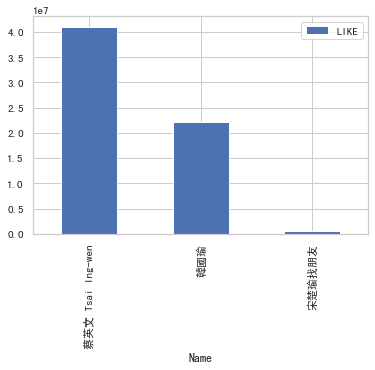

In [34]:
plt.rcParams['font.sans-serif']=['SimHei']
likedata.plot.bar(x='Name', y='LIKE')

## 切割日期並新增欄位

In [35]:
import pandas as pd 
data= pd.read_csv("Presidential candidate.csv")

In [36]:
data['Date'][0]
data['Date'][0].split("/")

['2020', '01', '11 23:00:48']

In [37]:
data['Month'] = data['Date'].apply(lambda x : x .split("/")[1]) #apply將date這個欄位所有值，

In [38]:
data['Hour'] = data['Date'].apply(lambda x : x .split("/")[2])

In [39]:
#data['Hour'] = data['Date'].apply(lambda x : x .split(" ")[2]) 細分 要在切割

In [40]:
data

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time,Month,Hour
0,2020/01/11 23:00:48,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,444772,402499,139,40762,1050,119,203,24666,20125,今天晚上，是屬於全體台灣人民的晚上。謝謝台灣人民的勇氣，謝謝台灣人民的堅持。\n \n各位...,NaN,NaN,1578754848000,01,11 23:00:48
1,2020/01/11 18:54:47,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,284895,262555,118,20756,1314,33,119,19454,2576,辣台派的大家都來了嗎？\n \n謝謝大家一路與我同行，今晚我們會繼續努力。感謝各位老朋友在...,Photos from 蔡英文 Tsai Ing-wen's post,NaN,1578740087000,01,11 18:54:47
2,2019/05/17 15:30:40,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,295136,254552,218,38284,1080,273,729,20462,34686,每個人的愛都是平等的，學習理解和共存，攜手向前\n \n今天，是台灣值得驕傲的一天，因為我...,NaN,NaN,1558078240000,05,17 15:30:40
3,2020/01/14 21:06:25,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,260573,246005,596,13690,177,28,77,9482,1754,今天和 陳菊(花媽) 秘書長一起去探望李前總統，他的精神很好。明天是李前總統的生日，我要提前...,NaN,NaN,1579007185000,01,14 21:06:25
4,2020/01/10 21:46:53,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,251103,235028,96,15346,332,165,136,10455,10915,今天我們在凱達格蘭大道，這裡是台灣從威權到民主的過程中，最關鍵的地方。鄭南榕的出殯隊伍，曾經...,NaN,NaN,1578664013000,01,10 21:46:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,2019/04/07 20:29:26,宋楚瑜找朋友,491399324358361,NaN,link,203,200,0,3,0,0,0,7,0,收假的夜晚，大家不妨在待會21:40-22:00，收看美國之音節目《海峽論談》，今晚將播出美...,美国之音中文网,美国之音中文官方脸书,1554640166000,04,07 20:29:26
1680,2020/01/01 11:55:23,宋楚瑜找朋友,491399324358361,NaN,photo,85,75,0,10,0,0,0,21,1,NaN,宋楚瑜找朋友's cover photo,NaN,1577850923000,01,01 11:55:23
1681,2019/12/22 09:33:17,蔡英文 Tsai Ing-wen,46251501064,NaN,video,60,59,0,1,0,0,0,0,0,選戰倒數20天，現在 陳建仁 Chen Chien-Jen副總統以及 賴清德副總統候選人，將...,2020 小英發言人,選戰倒數20天，現在陳建仁副總統以及賴清德副總統候選人，將領軍陪同我們雙北的立委候選人進行車...,1576978397000,12,22 09:33:17
1682,2019/04/12 04:01:08,韓國瑜,1863023523934803,NaN,video,55,52,0,2,0,1,0,2,1,想當年在政大東亞所讀書的時候，哈佛大學費正清研究中心之於我，就像南極大陸之於一名極限探險家一...,NaN,NaN,1555012868000,04,12 04:01:08


## 文章數

In [41]:
import pandas as pd 
data= pd.read_csv("Presidential candidate.csv")

In [42]:
print(max(data.Comment_Count)) 

105762


In [43]:
print(data[(data['Comment_Count'] == max(data.Comment_Count) )]) #將data中取出最多Comment_Count的貼文

                   Date         Page_Name      Page_ID  Link   Type  \
16  2020/01/10 19:00:21  蔡英文 Tsai Ing-wen  46251501064   NaN  video   

    All_Reaction_Count  LIKE_COUNT  WOW_COUNT  LOVE_COUNT  HAHA_COUNT  \
16              201558      163549        276       35082        1017   

    SAD_COUNT  ANGRY_COUNT  Comment_Count  Share_Count  \
16        223         1411         105762        14521   

                                              Message Link_Title  \
16  總統票3號蔡英文、賴清德，立委票請支持民主進步黨提名或推薦的候選人，第三張政黨票最重要，請集...     凱道選前之夜   

   Link Description   created_time  
16              NaN  1578654021000  


In [44]:
print(data[(data['Comment_Count'] == max(data.Comment_Count) )]['Message'])  #將data中取出最多Comment_Count的貼文，並顯示她的message

16    總統票3號蔡英文、賴清德，立委票請支持民主進步黨提名或推薦的候選人，第三張政黨票最重要，請集...
Name: Message, dtype: object


In [45]:
print(min(data.Comment_Count)) 
print(data[(data['Comment_Count'] == min(data.Comment_Count) )]['Message'])#將data中取出最少Comment_Count的貼文，並顯示她的message

0
1681    選戰倒數20天，現在 陳建仁 Chen Chien-Jen副總統以及 賴清德副總統候選人，將...
Name: Message, dtype: object


In [46]:
print(min(data.All_Reaction_Count)) 
print(data[(data['All_Reaction_Count'] == min(data.All_Reaction_Count) )]['Message'])#將data中取出最少All_Reaction_Count的貼文，並顯示她的message

55
1682    想當年在政大東亞所讀書的時候，哈佛大學費正清研究中心之於我，就像南極大陸之於一名極限探險家一...
Name: Message, dtype: object


## 取各個候選人like > 1000 的文章數

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [48]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.uniimport pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as npcode_minus'] = False
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['SimHei']})

In [49]:
import pandas as pd 
data= pd.read_csv("Presidential candidate.csv")

count() 的用法是計算個數
試試看sum(),mean(),median()...

In [50]:
likedata = data[(data['LIKE_COUNT'] > 1000)].groupby(by ='Page_Name').count().reset_index().sort_values('All_Reaction_Count')
#把data中大於1000以上的Like_ciunt取出，並以page_name為主軸，計算大於1000以上like的文章個數(count)，sort排序all_reaction個數

In [51]:
likedata

,Page_Name,Date,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
0,宋楚瑜找朋友,130,130,0,130,130,130,130,130,130,130,130,130,130,121,68,14,130
2,韓國瑜,552,552,0,552,552,552,552,552,552,552,552,552,552,541,296,52,552
1,蔡英文 Tsai Ing-wen,955,955,0,955,955,955,955,955,955,955,955,955,955,946,439,82,955


In [52]:
likedata = likedata.rename(columns={'All_Reaction_Count': '文章數'}) #用rename將All_Reaction_Count重新命名為文章數
print(likedata)
print(likedata.columns.values)

          Page_Name  Date  Page_ID  Link  Type  文章數  LIKE_COUNT  WOW_COUNT  \
0            宋楚瑜找朋友   130      130     0   130  130         130        130   
2               韓國瑜   552      552     0   552  552         552        552   
1  蔡英文 Tsai Ing-wen   955      955     0   955  955         955        955   

   LOVE_COUNT  HAHA_COUNT  SAD_COUNT  ANGRY_COUNT  Comment_Count  Share_Count  \
0         130         130        130          130            130          130   
2         552         552        552          552            552          552   
1         955         955        955          955            955          955   

   Message  Link_Title  Link Description  created_time  
0      121          68                14           130  
2      541         296                52           552  
1      946         439                82           955  
['Page_Name' 'Date' 'Page_ID' 'Link' 'Type' '文章數' 'LIKE_COUNT' 'WOW_COUNT'
 'LOVE_COUNT' 'HAHA_COUNT' 'SAD_COUNT' 'ANGRY_COUNT' 'Comme

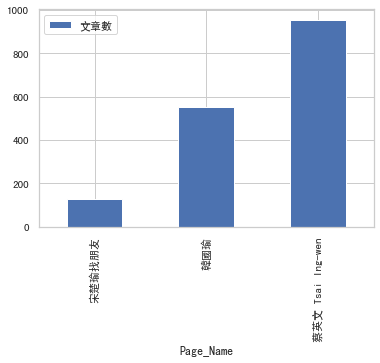

In [53]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
likedata.plot.bar(x='Page_Name', y='文章數')

比較兩個候選人

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [57]:
import pandas as pd 
data= pd.read_csv("Presidential candidate.csv")

In [59]:
likedata = data[((data['Page_Name']=='韓國瑜') | (data['Page_Name']=='宋楚瑜找朋友')) & (data['LIKE_COUNT'] > 500)].groupby(by ='Page_Name').count().reset_index().sort_values('All_Reaction_Count')
#把data中大於500以上的韓國瑜和宋楚的Like_ciunt取出，並以page_name為主軸，計算大於500以上like的文章個數(count)，sort排序all_reaction個數
#一個條件要一個()，|=or &=and 若放入條件，以上為例 韓|宋，其中一個符合韓或宋，且like>500  ;若為 韓&宋，則會需要同時符合韓宋兩個，

In [61]:
likedata = likedata.rename(columns={'All_Reaction_Count': '文章數'})
print(likedata)
print(likedata.columns.values)

  Page_Name  Date  Page_ID  Link  Type  文章數  LIKE_COUNT  WOW_COUNT  \
0    宋楚瑜找朋友   151      151     0   151  151         151        151   
1       韓國瑜   552      552     0   552  552         552        552   

   LOVE_COUNT  HAHA_COUNT  SAD_COUNT  ANGRY_COUNT  Comment_Count  Share_Count  \
0         151         151        151          151            151          151   
1         552         552        552          552            552          552   

   Message  Link_Title  Link Description  created_time  
0      139          78                19           151  
1      541         296                52           552  
['Page_Name' 'Date' 'Page_ID' 'Link' 'Type' '文章數' 'LIKE_COUNT' 'WOW_COUNT'
 'LOVE_COUNT' 'HAHA_COUNT' 'SAD_COUNT' 'ANGRY_COUNT' 'Comment_Count'
 'Share_Count' 'Message' 'Link_Title' 'Link Description' 'created_time']


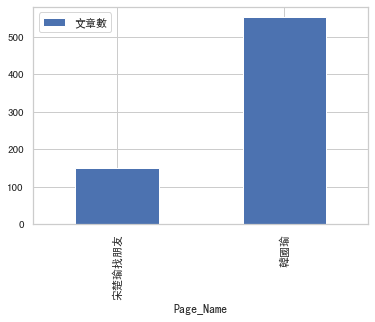

In [62]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

likedata.plot.bar(x='Page_Name', y='文章數')

In [64]:
likedata = data[((data['Page_Name']=='韓國瑜') | (data['Page_Name']=='蔡英文 Tsai Ing-wen')) & (data['LIKE_COUNT'] > 500)].groupby(by ='Page_Name').count().reset_index().sort_values('All_Reaction_Count')

          Page_Name  Date  Page_ID  Link  Type  文章數  LIKE_COUNT  WOW_COUNT  \
1               韓國瑜   552      552     0   552  552         552        552   
0  蔡英文 Tsai Ing-wen   957      957     0   957  957         957        957   

   LOVE_COUNT  HAHA_COUNT  SAD_COUNT  ANGRY_COUNT  Comment_Count  Share_Count  \
1         552         552        552          552            552          552   
0         957         957        957          957            957          957   

   Message  Link_Title  Link Description  created_time  
1      541         296                52           552  
0      948         440                82           957  
['Page_Name' 'Date' 'Page_ID' 'Link' 'Type' '文章數' 'LIKE_COUNT' 'WOW_COUNT'
 'LOVE_COUNT' 'HAHA_COUNT' 'SAD_COUNT' 'ANGRY_COUNT' 'Comment_Count'
 'Share_Count' 'Message' 'Link_Title' 'Link Description' 'created_time']


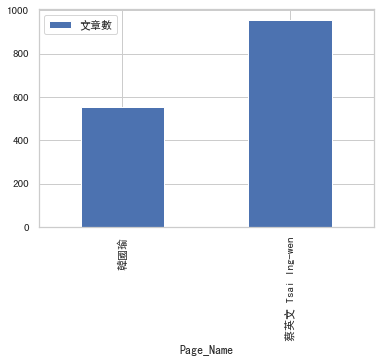

In [65]:
likedata = likedata.rename(columns={'All_Reaction_Count': '文章數'})
print(likedata)
print(likedata.columns.values)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
likedata.plot.bar(x='Page_Name', y='文章數')

## 發布文章type的比例

In [71]:
import pandas as pd
data= pd.read_csv("Presidential candidate.csv")
data.head()
likedata1 =  data.groupby(['Page_Name','Type']).count().reset_index()
likedata1 =  likedata1[likedata1['Page_Name'] == '韓國瑜']
likedata1['Page_ID'] = likedata1['Page_ID'].apply(lambda x :x/likedata1['Page_ID'].sum())
print(likedata1['Page_ID'])

8     0.041516
9     0.503610
10    0.129964
11    0.324910
Name: Page_ID, dtype: float64


([<matplotlib.patches.Wedge at 0x1ab68c246c8>,
 [Text(1.0906570761204022, 0.14306342058155708, 'link'),
  Text(-0.2957317734951926, 1.059501164768302, 'photo'),
  Text(-0.8470871128885402, -0.7017431319066527, 'status'),
  Text(0.5750145063437919, -0.9377410716686165, 'video')],
 [Text(0.5949038597020374, 0.07803459304448568, '4.2%'),
  Text(-0.16130824008828684, 0.5779097262372554, '50.4%'),
  Text(-0.4620475161210219, -0.38276898103999235, '13.0%'),
  Text(0.31364427618752283, -0.5114951300010635, '32.5%')])

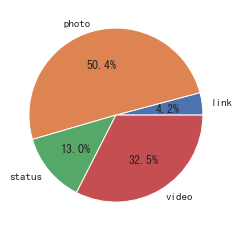

In [72]:
plt.pie(likedata1['Page_ID'] , labels = likedata1['Type'],autopct='%1.1f%%')

## 候選人每個月的發文趨勢

In [74]:
df= pd.read_csv("Presidential candidate.csv")
df.head(1)

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
0,2020/01/11 23:00:48,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,444772,402499,139,40762,1050,119,203,24666,20125,今天晚上，是屬於全體台灣人民的晚上。謝謝台灣人民的勇氣，謝謝台灣人民的堅持。\n \n各位...,NaN,NaN,1578754848000


In [75]:
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() 
#df.head(1)

df["Hour"] = df["Date"].str.split(" ").str.get(1).str.title().str.split(":").str.get(0)
df.head(1)

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time,Post_Date,Hour
0,2020/01/11 23:00:48,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,444772,402499,139,40762,1050,119,203,24666,20125,今天晚上，是屬於全體台灣人民的晚上。謝謝台灣人民的勇氣，謝謝台灣人民的堅持。\n \n各位...,NaN,NaN,1578754848000,2020/01/11,23


In [76]:
#格式化時間
df['Date'] = pd.to_datetime(df['Date'])

df['Week'] = df['Date'].dt.strftime('%A')
df.head(1)

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,...,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time,Post_Date,Hour,Week
0,2020-01-11 23:00:48,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,444772,402499,139,40762,1050,...,203,24666,20125,今天晚上，是屬於全體台灣人民的晚上。謝謝台灣人民的勇氣，謝謝台灣人民的堅持。\n \n各位...,NaN,NaN,1578754848000,2020/01/11,23,Saturday


## 折線圖

C:\Users\veniv\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


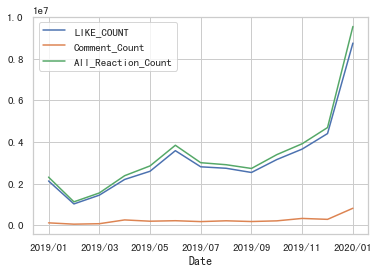

In [77]:
#篩選各政黨的資料
df_green = df[(df["Page_Name"] == "蔡英文 Tsai Ing-wen" )]

#一次抓很多筆
like_green = df_green.groupby(df['Date'].dt.strftime('%Y/%m'))['All_Reaction_Count','LIKE_COUNT','WOW_COUNT','HAHA_COUNT','SAD_COUNT','ANGRY_COUNT','Comment_Count','Share_Count'].sum().reset_index()
like_green

#比較按讚數和留言數的數量
like_green.plot(x='Date',y=['LIKE_COUNT','Comment_Count','All_Reaction_Count'])

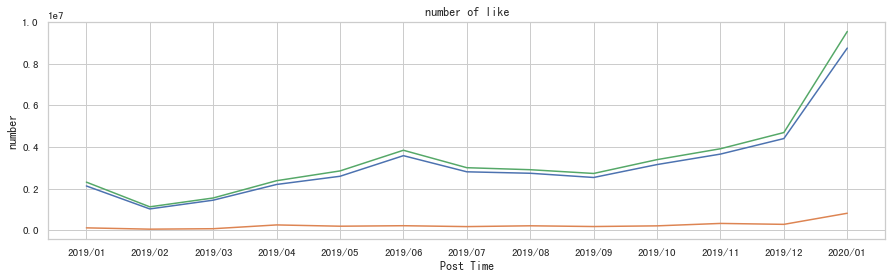

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4)) #設定圖表大小

plt.title("number of like") # 加標題
plt.xlabel("Post Time")     # 加x軸標題
plt.ylabel("number")        # 加y軸標題   

#可以用疊加的方式，把想要的變數畫上去
plt.plot(like_green['Date'],like_green['LIKE_COUNT'])
plt.plot(like_green['Date'],like_green['Comment_Count'])
plt.plot(like_green['Date'],like_green['All_Reaction_Count'])

In [81]:
#把每個政黨每天發幾篇文算一次
df_post = df.groupby(['Page_Name','Post_Date'])['LIKE_COUNT'].count().reset_index(name='count')
#注意要加'reset_index(name='count')'才會變成dataframe
#df_post

#把國民黨單獨拿出來
df_blue = df_post[df_post['Page_Name']=='韓國瑜']
#df_tw = df_post[df_post['Page_Name']=='蔡英文 Tsai Ing-wen']
#df_green = df_post[df_post['Page_Name']=='宋楚瑜找朋友']

df_blue

,Page_Name,Post_Date,count
468,韓國瑜,2019/01/01,2
469,韓國瑜,2019/01/03,1
470,韓國瑜,2019/01/04,2
471,韓國瑜,2019/01/06,2
472,韓國瑜,2019/01/10,1
...,...,...,...
759,韓國瑜,2020/01/27,3
760,韓國瑜,2020/01/28,2
761,韓國瑜,2020/01/29,1
762,韓國瑜,2020/01/30,2


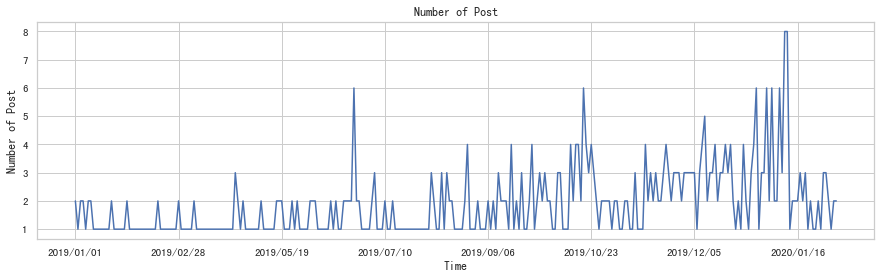

In [82]:
import matplotlib.ticker as ticker

plt.figure(figsize=(15,4)) #設定圖表大小

plt.title("Number of Post") # 加標題
plt.xlabel("Time")          # 加x軸標題
plt.ylabel("Number of Post")        # 加y軸標題   

plt.plot(df_blue['Post_Date'],df_blue['count'])
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(40)) #調整x軸要顯示幾個值
plt.show()

## 畫出各政黨每個月的發文熱圖

In [83]:
#選出國民黨的發文
df_blue = df[df['Page_Name']=='韓國瑜']

#算每星期每小時發了幾篇
df_post_blue = df.groupby(['Week','Hour'])['LIKE_COUNT'].count().reset_index(name='count')

df_post_blue

,Week,Hour,count
0,Friday,00,2
1,Friday,01,1
2,Friday,03,1
3,Friday,04,2
4,Friday,07,4
...,...,...,...
133,Wednesday,19,21
134,Wednesday,20,21
135,Wednesday,21,22
136,Wednesday,22,27


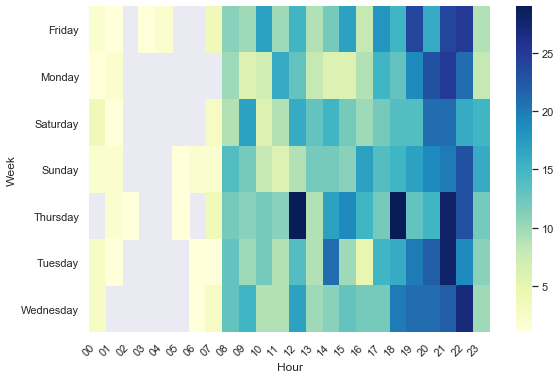

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

flights = df_post_blue.pivot("Week", "Hour", "count")
# 畫出x-y-z的圖，比如 年-月-銷量 的熱圖
f, ax = plt.subplots(figsize=(9, 6))
#使用不同的顏色
sns.heatmap(flights, fmt="d",cmap='YlGnBu', ax=ax)
#設置座標字體方向
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()